In [1]:
%load_ext autoreload
%autoreload 2

https://medium.com/auquan/time-series-analysis-for-financial-data-part-1-stationarity-autocorrelation-and-white-noise-1a1cc2fb23f2

https://medium.com/auquan/time-series-analysis-ii-auto-regressive-models-d0cb1a8a7c43

https://medium.com/auquan/time-series-analysis-for-financial-data-iii-moving-average-models-cccf027f264e


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [38]:
# ms = pd.read_csv('data/psfa_microsoft.csv')
ms = pd.read_csv('data/psfa_facebook.csv')
# ms = pd.read_csv('data/psfa_apple.csv')
# ms = pd.read_csv('data/psfa_ind_Nikkei225.csv')
# ms = pd.read_csv('data/psfa_tsla.csv')
# ms = pd.read_csv('apple.csv')
ms = pd.read_csv('amazon.csv')
# ms = pd.read_csv('data/psfa_ind_nasdaq_composite.csv')

In [39]:
ms['Close'] = ms[' Close/Last'].apply(lambda x: float(x.replace('$', '')))

In [40]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

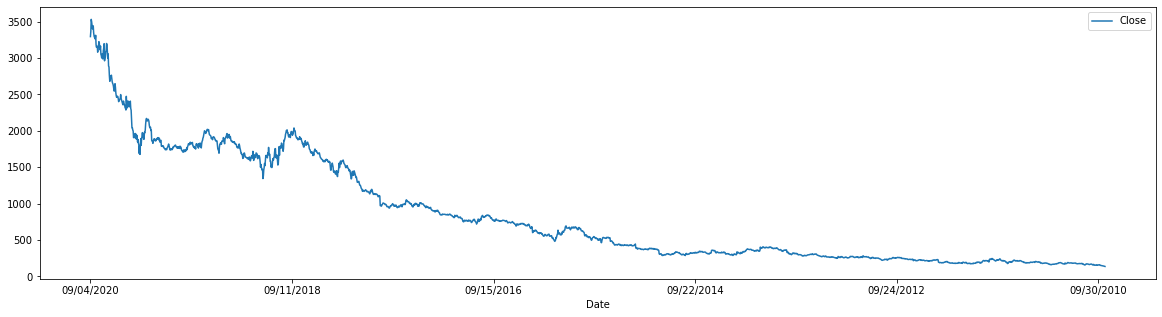

In [41]:
ms.plot(x='Date', y='Close', figsize=(20, 5))

In [42]:
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)
mu, sigma

(-0.0012627972335206125, 0.019728805814046034)

# Probabilidad de que el retorno caiga más de un 1%

In [43]:
days = range(1, 300)
loss = 0.01
umbral = np.log(1-loss)
rango = np.linspace(-0.2, 0.2, 100)
probs = []
pdfs = []
for i in days:
    mu_n = i*mu
    sigma_n = (i**0.5)*sigma
    probs.append(norm.cdf(umbral, mu_n, sigma_n))
    pdfs.append(norm.pdf(rango, mu_n, sigma_n))

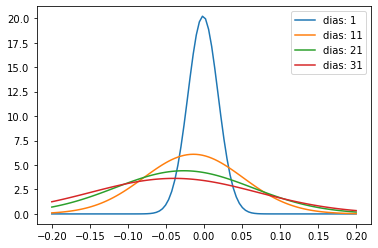

In [44]:
idx = range(0, 40, 10)
for i in idx:
    plt.plot(rango, pdfs[i], label=f'dias: {i+1}')
plt.legend()

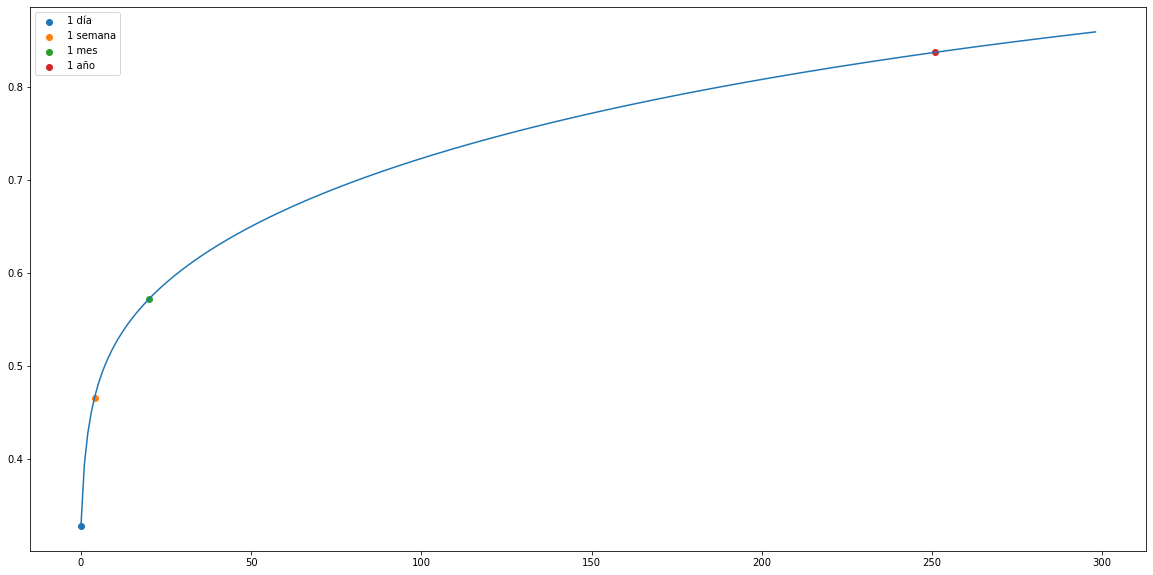

In [45]:
plt.figure(figsize=(20,10))
plt.plot(probs)
plt.scatter(0, probs[0], label='1 día')
plt.scatter(4, probs[4], label='1 semana')
plt.scatter(20, probs[20], label='1 mes')
plt.scatter(251, probs[251], label='1 año')
plt.legend()

# Independencia y Autocorrelación

In [46]:
correlations = []
for i in range(300):
    ms[f'LogReturn_{i+1}'] = ms['LogReturn'].shift(-(i+1))
    correlations.append(ms['LogReturn'].corr(ms[f'LogReturn_{i+1}']))
# ms['LogReturn'].corr(ms['LogReturn_1'])
# np.corrcoef(ms['LogReturn'][:-2], ms['LogReturn_1'][:-2])

In [47]:
ms[['LogReturn', 'LogReturn_1','LogReturn_2', 'LogReturn_3',  'LogReturn_4']].corr()

,LogReturn,LogReturn_1,LogReturn_2,LogReturn_3,LogReturn_4
LogReturn,1.000000,-0.023232,-0.015297,-0.023983,-0.021728
LogReturn_1,-0.023232,1.000000,-0.024427,-0.015113,-0.023692
LogReturn_2,-0.015297,-0.024427,1.000000,-0.024063,-0.014506
LogReturn_3,-0.023983,-0.015113,-0.024063,1.000000,-0.024167
LogReturn_4,-0.021728,-0.023692,-0.014506,-0.024167,1.000000


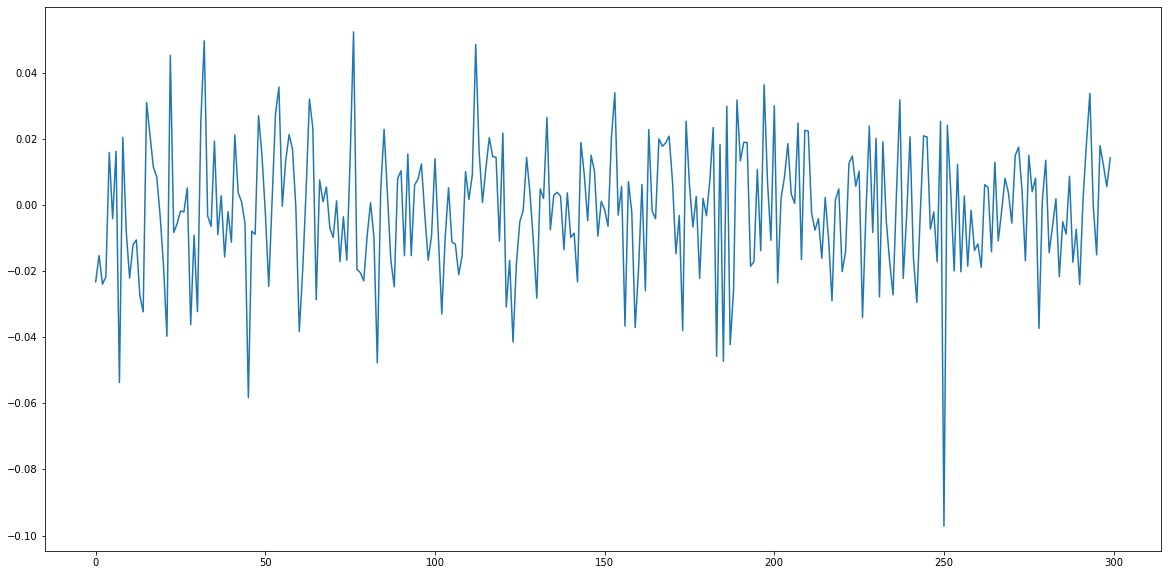

In [48]:
plt.figure(figsize=(20,10))
plt.plot(correlations)

In [160]:
ms['LogReturn'].autocorr(lag=40)

0.1160669207939074

In [51]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

In [52]:
auto_corr = autocorr(ms['LogReturn'].values[:-1])

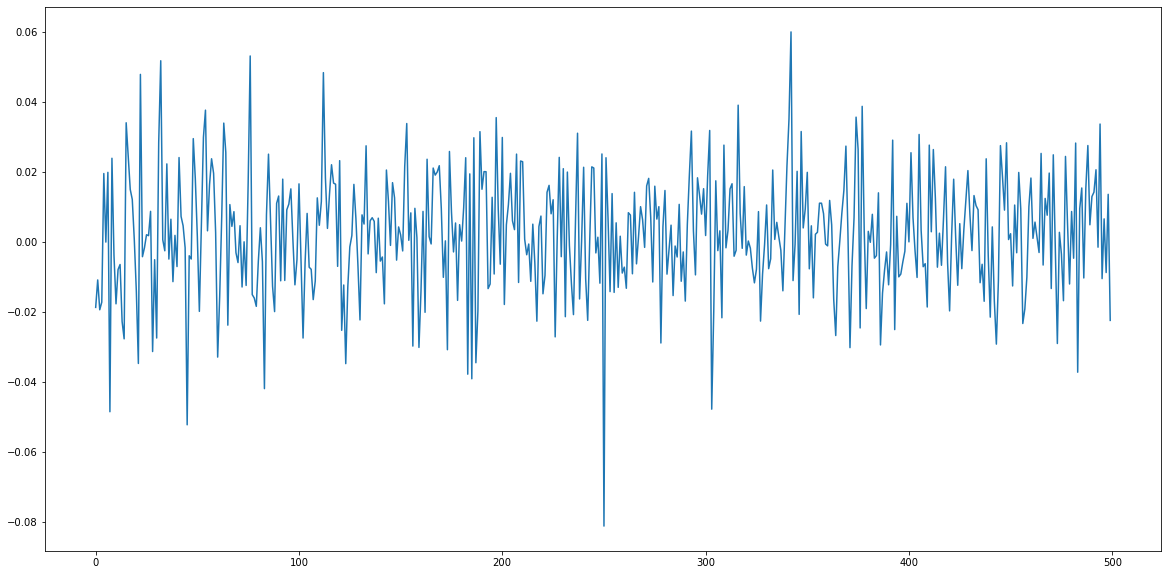

In [53]:
plt.figure(figsize=(20,10))
plt.plot(auto_corr[1:501])

# Ruido Blanco

In [54]:
mu, sigma

(-0.0012627972335206125, 0.019728805814046034)

In [55]:
white_noise = np.random.normal(mu, sigma, len(ms))
auto_corr_wn = autocorr(white_noise)

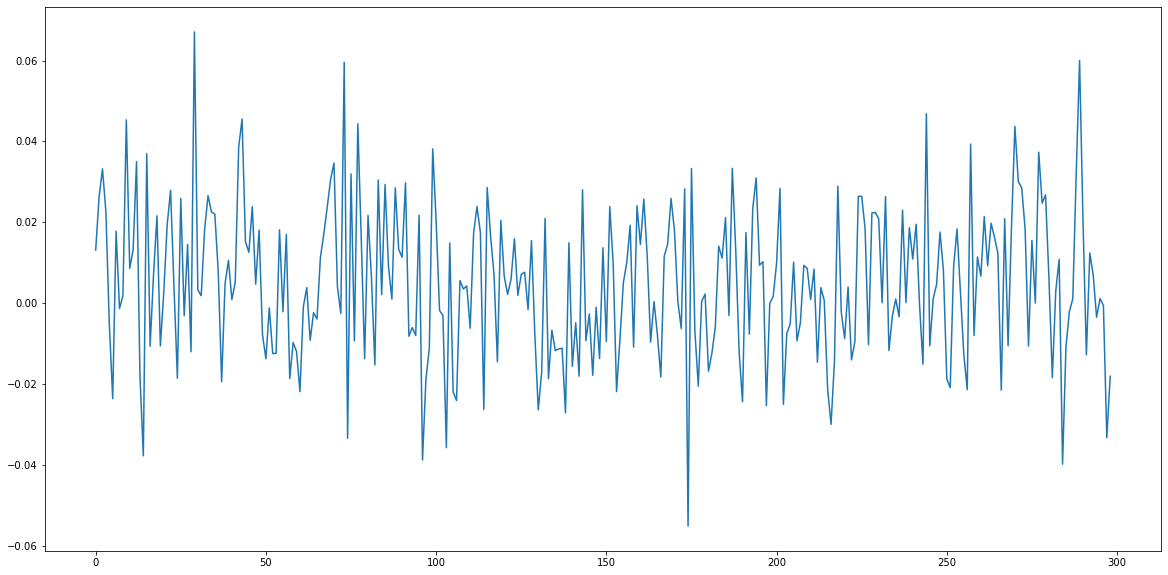

In [56]:
plt.figure(figsize=(20,10))
plt.plot(auto_corr_wn[:300][1:301])

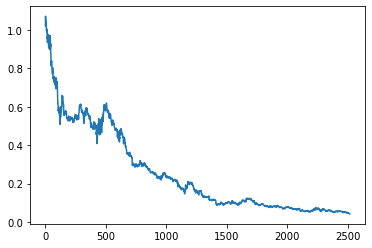

In [87]:
plt.plot(np.exp(ms['LogReturn'].cumsum()))

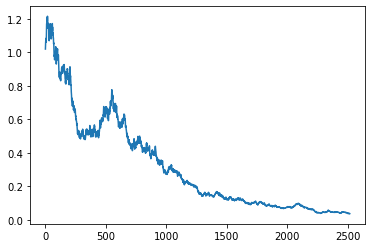

In [91]:
white_noise = np.random.normal(mu, sigma, len(ms))
plt.plot(np.exp(white_noise.cumsum()))

# AR